In [1]:
import sys
sys.path.append('/uio/kant/geo-metos-u7/franzihe/Documents/Thesis/Python')
import createFolder as cF

from pyhdf.SD import SD, SDC # To read a HDF file (SD data)
from pyhdf.HDF import *
from pyhdf.VS import *

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from mpl_toolkits.axes_grid1 import make_axes_locatable
import pylab

import pandas as pd
import time

import pprint

In [8]:
year_month = 201612
year_month = 201611
targetfolder = '../../Data/CloudSat/2C_Precip/%s/' %year_month
sourcefolder = '../../../../Downloads'
file = 'SNOW-PROFILE'
processing = 'P'
day = '2016358111138_56684'
day = '2016317111800_56087'

savefig = 0

In [9]:
#---------- Read HDF Files (VD data) ----------#

f = HDF(targetfolder+'%s_CS_2C-%s_GRANULE_%s_R04_E06.hdf' %(day,file,processing)) 
vs = f.vstart() 
data_info_list = vs.vdatainfo()
pprint.pprint(data_info_list)

Latitude = vs.attach('Latitude')
Longitude = vs.attach('Longitude')
Profile_time = vs.attach('Profile_time')
UTC_start = vs.attach('UTC_start')
TAI_start = vs.attach('TAI_start')

Lat = Latitude[:]
Lon = Longitude[:]
Ptime = Profile_time[:]
UTC = UTC_start[:]
TAI = TAI_start[:]

Latitude.detach() # "close" the vdata
Longitude.detach() # "close" the vdata
Profile_time.detach()
UTC_start.detach()
TAI_start.detach()

vs.end() # terminate the vdata interface
f.close() 

[('Profile_time', '', 7, 20678, 1, 0, 4, 1962, 0),
 ('UTC_start', '', 8, 1, 1, 0, 4, 1962, 0),
 ('TAI_start', '', 9, 1, 1, 0, 8, 1962, 0),
 ('Latitude', '', 10, 20678, 1, 0, 4, 1962, 0),
 ('Longitude', '', 11, 20678, 1, 0, 4, 1962, 0),
 ('DEM_elevation', '', 13, 20678, 1, 0, 2, 1962, 0),
 ('Vertical_binsize', '', 14, 1, 1, 0, 4, 1962, 0),
 ('Data_quality', '', 15, 20678, 1, 0, 1, 1962, 0),
 ('Data_status', '', 16, 20678, 1, 0, 1, 1962, 0),
 ('Data_targetID', '', 17, 20678, 1, 0, 1, 1962, 0),
 ('snow_retrieval_status', '', 18, 20678, 1, 0, 1, 1962, 0),
 ('norm_chi_square', '', 19, 20678, 1, 0, 4, 1962, 0),
 ('snowfall_rate_sfc', '', 32, 20678, 1, 0, 4, 1962, 0),
 ('snowfall_rate_sfc_uncert', '', 33, 20678, 1, 0, 4, 1962, 0),
 ('snowfall_rate_sfc_confidence', '', 34, 20678, 1, 0, 1, 1962, 0),
 ('nray:2C-SNOW-PROFILE', 'DimVal0.1', 203, 1, 1, 0, 4, 1962, 0),
 ('nbin:2C-SNOW-PROFILE', 'DimVal0.1', 205, 1, 1, 0, 4, 1962, 0)]


In [10]:
#---------- Read HDF Files ----------#

cpr_2c_snow = SD(targetfolder+'%s_CS_2C-%s_GRANULE_%s_R04_E06.hdf' %(day,file,processing), SDC.READ)
datasets_dic = cpr_2c_snow.datasets()

sds_dic = {}
for key, value in datasets_dic.items():
    sds_dic[value[3]] = key
pprint.pprint( sds_dic)

{0: 'Height',
 1: 'snowfall_rate',
 2: 'snowfall_rate_uncert',
 3: 'log_N0',
 4: 'log_N0_uncert',
 5: 'log_lambda',
 6: 'log_lambda_uncert',
 7: 'snow_water_content',
 8: 'snow_water_content_uncert'}


In [11]:
cpr_2c_snow_height = cpr_2c_snow.select('Height')
cpr_2c_snow_snow_water_content = cpr_2c_snow.select('snow_water_content')

cpr_2c_snow_height_data = cpr_2c_snow_height.get()
cpr_2c_snow_snow_water_content_data = cpr_2c_snow_snow_water_content.get()

In [15]:
pd.DataFrame(cpr_2c_snow_snow_water_content_data)

,0,1,2,3,4,5,6,7,8,9,...,115,116,117,118,119,120,121,122,123,124
0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
1,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
3,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
4,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
5,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
6,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
7,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
8,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
9,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0


In [33]:
np.array(Ptime).shape

(20678, 1)

In [37]:
a = np.repeat(Ptime,cpr_2c_snow_height_data.shape[1],axis=1)

In [30]:
cpr_2c_snow_height_data.shape

(20678, 125)

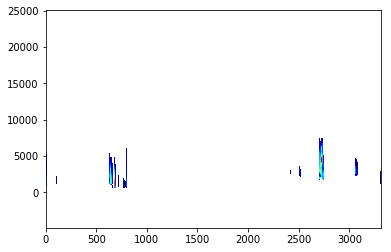

In [42]:
ax = plt.subplot(111)
im = ax.contourf(a.T, cpr_2c_snow_height_data.T,
                 cpr_2c_snow_snow_water_content_data.T,cmap=cm.jet,levels=np.arange(0,0.35,0.01))

In [43]:
def findSubsetIndices(min_lat,max_lat,min_lon,max_lon,lats,lons):
    
    """Array to store the results returned from the function"""
    res=np.zeros((4),dtype=np.float64)
    minLon=min_lon; maxLon=max_lon
    
    distances1 = []; distances2 = []
    indices=[]; index=1
    
    for point in lats:
        s1 = max_lat-point # (vector subtract)
        s2 = min_lat-point # (vector subtract)
        distances1.append((np.dot(s1, s1), point, index))
        distances2.append((np.dot(s2, s2), point, index-1))
        index=index+1
        
    distances1.sort()
    distances2.sort()
    indices.append(distances1[0])
    indices.append(distances2[0])
    
    distances1 = []; distances2 = []; index=1
   
    for point in lons:
        s1 = maxLon-point # (vector subtract)
        s2 = minLon-point # (vector subtract)
        distances1.append((np.dot(s1, s1), point, index))
        distances2.append((np.dot(s2, s2), point, index-1))
        index=index+1
        
    distances1.sort()
    distances2.sort()
    indices.append(distances1[0])
    indices.append(distances2[0])
    
    """ Save final product: max_lat_indices,min_lat_indices,max_lon_indices,min_lon_indices"""
    minJ=indices[1][2] # min_lat_indices
    maxJ=indices[0][2]
    minI=indices[3][2]
    maxI=indices[2][2] # max_lon_indices
    
    res[0]=minI; res[1]=maxI; res[2]=minJ; res[3]=maxJ;
    return res

In [44]:
stn_lat      = 59.81
stn_lon      = 7.21

lower_lat = stn_lat -1.
upper_lat = stn_lat +1.

left_lon = stn_lon -1.
right_lon = stn_lon +1.

res = findSubsetIndices(lower_lat,upper_lat,left_lon,right_lon,np.array(Lat),np.array(Lon))

In [45]:
Hlat = Lat[int(res[2]) : int(res[3])]

In [58]:
Hlat[0], Hlat[-1]

([58.80953598022461], [60.80949783325195])

In [48]:
Htime = a[int(res[2]) : int(res[3]),:]

In [49]:
Hlon = Lon[int(res[2]) : int(res[3])]

In [50]:
data = cpr_2c_snow_snow_water_content_data[int(res[2]) : int(res[3]),:]

In [51]:
height = cpr_2c_snow_height_data[int(res[2]) : int(res[3]),:]

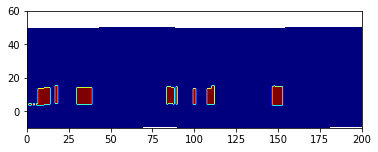

In [56]:
img = np.zeros((data.shape[0],data.shape[1]))
img.fill(np.nan)


for i in np.arange(data.shape[0]):
    for j in np.arange(data.shape[1]):
        k = int( data.shape[1] * (height[i,j] + 5000) / 35000 )
        if data[i,j] > -3000 and \
                   data[i,j] < 2100:
            img[i,k] = data[i,j] 
            
ax = plt.subplot(111)
im = ax.imshow(img.T, interpolation='bilinear',  #vmin = -10, vmax = 30, 
               cmap=cm.jet, origin='lower', extent=[0,200,-10,60])